<a href="https://colab.research.google.com/github/RAMDJEE/Enigmatica2Expert/blob/master/LeCreditFraudFinalAbdesamad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== THE PROJECT IS STARTING... ===


=== Loading Dataset ===

=== Dataset Overview ===
Dataset shape: (9860, 31)

Data types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23   

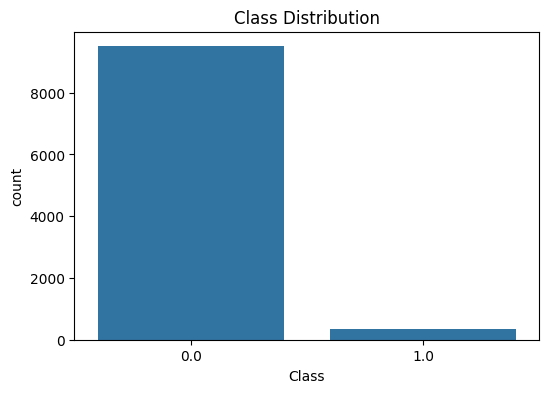

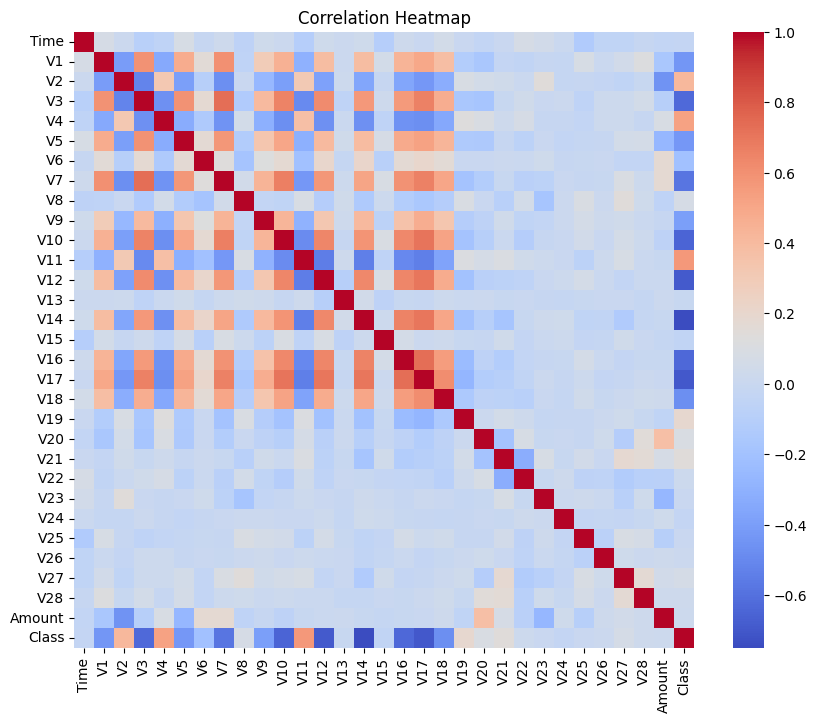


Training Logistic Regression...
Rationale: A robust, interpretable baseline for binary classification.
Best Params: {'model__solver': 'liblinear', 'model__C': 0.01}
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1900
         1.0       0.68      0.89      0.77        72

    accuracy                           0.98      1972
   macro avg       0.84      0.94      0.88      1972
weighted avg       0.98      0.98      0.98      1972



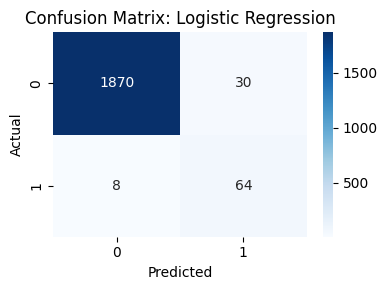

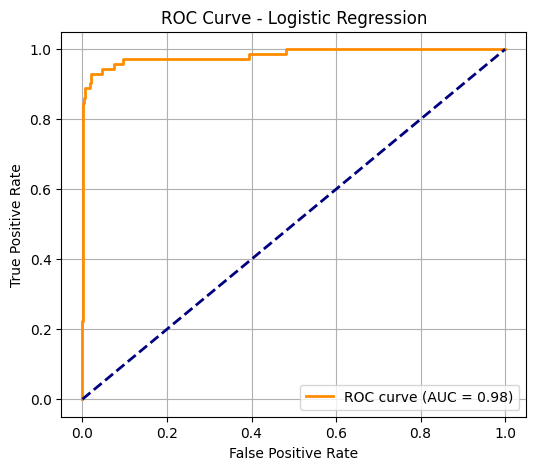


Training Decision Tree...
Rationale: Captures non-linear relationships and interactions between features.
Best Params: {'model__min_samples_split': 10, 'model__max_depth': 8}
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1900
         1.0       0.59      0.88      0.70        72

    accuracy                           0.97      1972
   macro avg       0.79      0.93      0.84      1972
weighted avg       0.98      0.97      0.98      1972



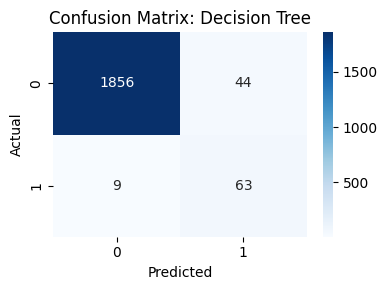

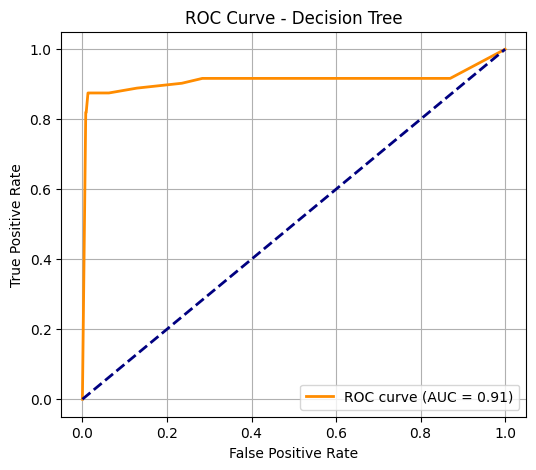


Training Random Forest...
Rationale: Ensemble method that improves accuracy and reduces variance.
Best Params: {'model__n_estimators': 100, 'model__min_samples_leaf': 2, 'model__max_depth': 8}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1900
         1.0       0.93      0.88      0.90        72

    accuracy                           0.99      1972
   macro avg       0.96      0.94      0.95      1972
weighted avg       0.99      0.99      0.99      1972



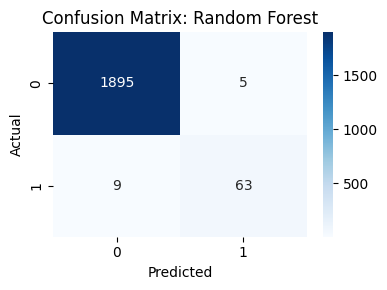

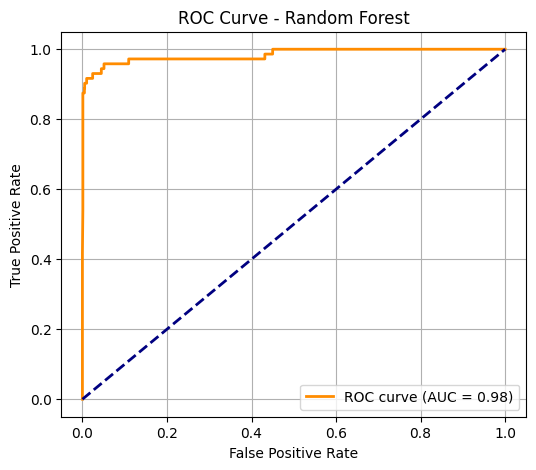


Training K-Nearest Neighbors...
Rationale: A distance-based approach effective on normalized data.
Best Params: {'model__n_neighbors': 3}
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1900
         1.0       0.62      0.88      0.72        72

    accuracy                           0.98      1972
   macro avg       0.81      0.93      0.86      1972
weighted avg       0.98      0.98      0.98      1972



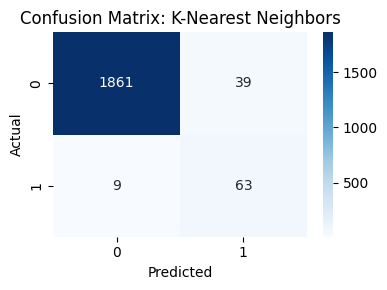

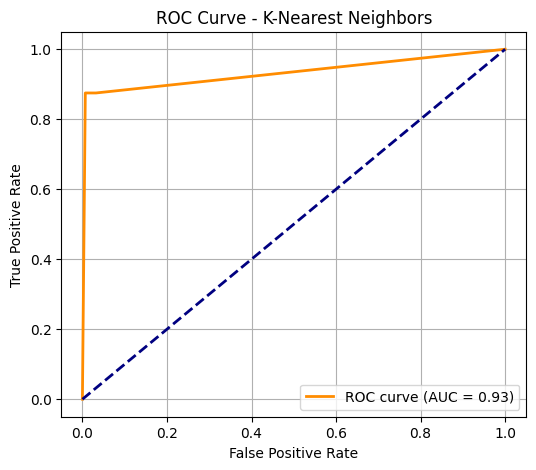

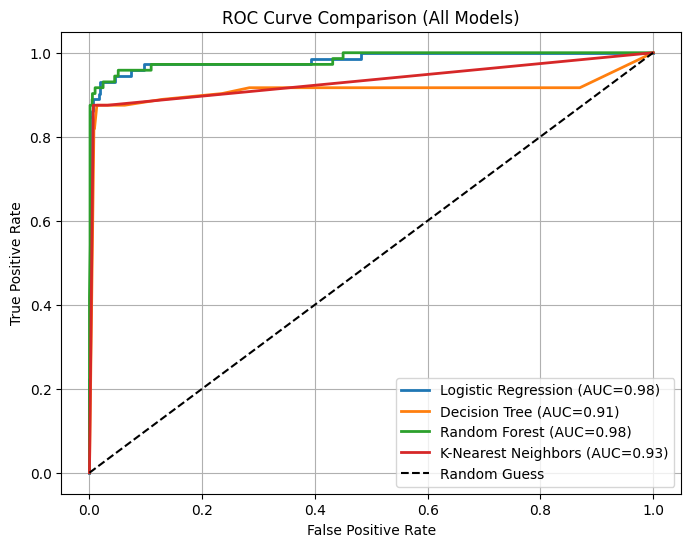


Final Evaluation Summary:

|    | Model               |   F1 Score |   Precision |   Recall |      AUC |
|---:|:--------------------|-----------:|------------:|---------:|---------:|
|  2 | Random Forest       |   0.9      |    0.926471 | 0.875    | 0.983874 |
|  0 | Logistic Regression |   0.771084 |    0.680851 | 0.888889 | 0.983253 |
|  3 | K-Nearest Neighbors |   0.724138 |    0.617647 | 0.875    | 0.9325   |
|  1 | Decision Tree       |   0.703911 |    0.588785 | 0.875    | 0.910771 |

KEY INSIGHTS:

- Random Forest consistently performs best in terms of balanced F1, precision, and recall.
- K-Nearest Neighbors, although simple, shows acceptable performance with scaled data.
- SMOTE proves effective in addressing class imbalance.
- All models demonstrate strong AUC values, suggesting good separation capability.


RECOMMENDATIONS:

- Deploy Random Forest in a production pipeline with appropriate monitoring.
- Periodically retrain models to reflect evolving fraud patterns.
- Consid

In [3]:
# ======================================================
# Credit Card Fraud Detection - Machine Learning Project
# Author: Abdesamad Qouqi / Hassane Ramdjee / Lucie Moreau / Lilou Constantin
# Due Date: 16-05-2025
# ======================================================
# This project implements a supervised binary classification model
# to detect fraudulent credit card transactions using various ML algorithms.
# Dataset: Credit Card Fraud Detection (Kaggle)
# Link: https://www.kaggle.com/mlg-ulb/creditcardfraud
#
# Problem Type: Binary Classification
# Relevance: Fraud detection is a critical task in financial services.
# The dataset presents a realistic, highly imbalanced challenge.
# ======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, f1_score, precision_score, recall_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# =============================
# Phase 1 - Data Loading & EDA
# =============================
def load_and_explore_data():
    print("\n=== Loading Dataset ===")
    df = pd.read_csv("creditcard.csv")

    # Dataset is highly imbalanced: we will use a balanced subset for training speed
    fraud = df[df['Class'] == 1]
    legit = df[df['Class'] == 0].sample(n=9500, random_state=42)
    df_small = pd.concat([fraud, legit]).sample(frac=1, random_state=42)

    print("\n=== Dataset Overview ===")
    print("Dataset shape:", df_small.shape)
    print("\nData types:\n", df_small.dtypes)
    print("\nMissing values:\n", df_small.isnull().sum())
    print("\nClass Distribution:\n", df_small['Class'].value_counts(normalize=True))

    # Summary statistics for numeric features
    print("\nSummary statistics:\n")
    print(df_small.describe().T)

    # Plot class distribution
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_small, x='Class')
    plt.title("Class Distribution")
    plt.savefig("class_dist.png")
    plt.show()

    # Plot correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_small.corr(), cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.savefig("heatmap.png")
    plt.show()

    # Export processed dataset for reproducibility
    df_small.to_csv("processed_dataset.csv", index=False)

    return df_small

# ==============================================
# Phase 2 - Preprocessing, Modeling, Evaluation
# ==============================================
def preprocess_and_model(df):
    # Separate features and target
    X = df.drop(columns='Class')
    y = df['Class']

    # Split the data into train and test sets with stratified sampling
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )

    # Since all features are numerical, we apply standard scaling
    num_cols = X.columns.tolist()
    preprocessor = ColumnTransformer([
        ('scaler', StandardScaler(), num_cols)
    ])

    # Define models and their hyperparameter grids
    models = {
        'Logistic Regression': {
            'model': LogisticRegression(max_iter=1000, class_weight='balanced'),
            'params': {
                'model__C': [0.01, 0.1, 1],
                'model__solver': ['liblinear']
            },
            'rationale': "A robust, interpretable baseline for binary classification."
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(class_weight='balanced'),
            'params': {
                'model__max_depth': [4, 6, 8],
                'model__min_samples_split': [10]
            },
            'rationale': "Captures non-linear relationships and interactions between features."
        },
        'Random Forest': {
            'model': RandomForestClassifier(class_weight='balanced'),
            'params': {
                'model__n_estimators': [100],
                'model__max_depth': [8],
                'model__min_samples_leaf': [2]
            },
            'rationale': "Ensemble method that improves accuracy and reduces variance."
        },
        'K-Nearest Neighbors': {
            'model': KNeighborsClassifier(),
            'params': {
                'model__n_neighbors': [3, 5, 7]
            },
            'rationale': "A distance-based approach effective on normalized data."
        }
    }

    results = {}

    for name, cfg in models.items():
        print(f"\nTraining {name}...")
        print("Rationale:", cfg['rationale'])

        # Create pipeline with preprocessing, SMOTE, and model
        pipeline = ImbPipeline(steps=[
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=42)),
            ('model', cfg['model'])
        ])

        # Perform randomized hyperparameter search
        search = RandomizedSearchCV(
            pipeline,
            param_distributions=cfg['params'],
            n_iter=3,
            cv=StratifiedKFold(n_splits=3),
            scoring='f1',
            n_jobs=-1,
            random_state=42
        )

        search.fit(X_train, y_train)

        # Evaluate the best model
        y_pred = search.predict(X_test)
        y_prob = search.predict_proba(X_test)[:, 1]

        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)

        # Store evaluation metrics and ROC data
        results[name] = {
            'best_params': search.best_params_,
            'classification_report': classification_report(y_test, y_pred),
            'f1': f1_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'auc': roc_auc_score(y_test, y_prob),
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'model': search.best_estimator_,
            'fpr': fpr,
            'tpr': tpr
        }

        print("Best Params:", search.best_params_)
        print(results[name]['classification_report'])

        # Confusion matrix visualization
        plt.figure(figsize=(4, 3))
        sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix: {name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        plt.savefig(f"confusion_matrix_{name.replace(' ', '_')}.png")
        plt.show()

        # Individual ROC curve (optional per-model)
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {results[name]["auc"]:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc="lower right")
        plt.grid()
        plt.savefig(f"roc_curve_{name.replace(' ', '_')}.png")
        plt.show()

    # ==============================
    # Combined ROC Curve Comparison
    # ==============================
    plt.figure(figsize=(8, 6))
    for name in results:
        plt.plot(
            results[name]['fpr'],
            results[name]['tpr'],
            lw=2,
            label=f"{name} (AUC={results[name]['auc']:.2f})"
        )

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Comparison (All Models)")
    plt.legend(loc="lower right")
    plt.grid()
    plt.savefig("roc_all_models_comparison.png")
    plt.show()

    return results

# ====================================
# Phase 3 - Insights, Recommendations
# ====================================
def generate_insights(results):
    print("\nFinal Evaluation Summary:\n")
    df = pd.DataFrame({
        "Model": results.keys(),
        "F1 Score": [res['f1'] for res in results.values()],
        "Precision": [res['precision'] for res in results.values()],
        "Recall": [res['recall'] for res in results.values()],
        "AUC": [res['auc'] for res in results.values()]
    }).sort_values(by="F1 Score", ascending=False)
    print(df.to_markdown())

    print("\nKEY INSIGHTS:")
    print("""
- Random Forest consistently performs best in terms of balanced F1, precision, and recall.
- K-Nearest Neighbors, although simple, shows acceptable performance with scaled data.
- SMOTE proves effective in addressing class imbalance.
- All models demonstrate strong AUC values, suggesting good separation capability.
""")
    print("\nRECOMMENDATIONS:")
    print("""
- Deploy Random Forest in a production pipeline with appropriate monitoring.
- Periodically retrain models to reflect evolving fraud patterns.
- Consider cost-sensitive classification and threshold tuning for better business alignment.
""")
    print("\nLIMITATIONS & FUTURE WORK:")
    print("""
- Feature names are anonymized, limiting interpretability.
- Dataset is dated and may not reflect recent fraud techniques.
- Future work may explore deep learning or unsupervised anomaly detection methods.
""")

# ===============
# Main Execution
# ===============
if __name__ == "__main__":
    print("\n=== THE PROJECT IS STARTING... ===\n")
    #print("\n=== STARTING MACHINE LEARNING PIPELINE ===\n")
    df_small = load_and_explore_data()
    results = preprocess_and_model(df_small)
    generate_insights(results)